# Proyek UTS PMDPM

<b>Harap jangan menghapus cell dan komentar yang diberikan!</b>

Setiap cell markdown dan code akan berisi instruksi pengerjaan Proyek UTS PMDPM

Dalam notebook ini Anda akan diminta untuk membuat sebuah proyek Pembelajaran Mesin menggunakan dataset yang sudah disediakan. Proyek akan terdiri dari proses inisialisasi, data loading, data cleansing, feature engineering, modelling dan evaluasi model. Pada bagian akhir silahkan berikan laporan singkat dari proyek yang sudah dikerjakan

## Studi Kasus

Dataset: Stroke Prediction Dataset (https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset) 

Deskripsi: Menurut WHO, stroke adalah penyebab kematian nomor 2 di dunia, sekitar 11% dari total kematian. Dataset ini digunakan untuk memprediksi apakah pasien memiliki kemungkinan terkena stroke berdasarkan input seperti gender, usia, penyakit bawaan, dan status merokok [3]. Setiap baris data menyediakan informasi relevan mengenai pasien. 

Informasi atribut: 

1) id: unique identifier 

2) gender: "Male", "Female" or "Other" 

3) age: age of the patient 

4) hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension 

5) heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease 

6) ever_married: "No" or "Yes" 

7) work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed" 

8) Residence_type: "Rural" or "Urban" 

9) avg_glucose_level: average glucose level in blood 

10) bmi: body mass index 

11) smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"* 

12) stroke: 1 if the patient had a stroke or 0 if not 

*Note: "Unknown" in smoking_status means that the information is unavailable for this patient 

## Penjelasan Tugas

Terapkan pemrosesan dataset dari loading, data cleansing (jika perlu), data scaling, feature selection, hingga evaluasi model secara sederhana menggunakan code yang sudah dipelajari dalam latihan-latihan dan tugas.

### Inisialisasi

Bagian berikut berisi import library yang dibutuhkan

### Data Loading

Bagian berikut berisi proses data loading (boleh dengan file upload atau dengan mount drive), jangan lupa tampilkan 20 baris data teratas!

In [2]:
#loading data yang akan diolah
from google.colab import files
uploaded = files.upload()

Saving healthcare-dataset-stroke-data.csv to healthcare-dataset-stroke-data.csv


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
stroke = pd.read_csv('healthcare-dataset-stroke-data.csv')
df_stroke = pd.DataFrame(stroke)

In [4]:
df_stroke.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


### Data Cleansing

Bagian berikut berisi proses pembersihan data (jika diperlukan, minimal cek apakah ada data yang kosong atau duplikat)

In [5]:
#bersihkan dataset menggunakan metode yang sudah dipelajari
df_stroke.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [6]:
average = df_stroke['bmi'].mean()
average

28.893236911794666

In [7]:
df_stroke.bmi=(df_stroke.bmi.fillna(28.74))

In [8]:
df_stroke.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [9]:
#ubah data string menjadi data numeric
df_stroke["gender"].replace({'Male': 0, "Female": 1, "Other": -1}, inplace=True)
df_stroke["ever_married"].replace({'Yes': 1, "No": 0}, inplace=True)
df_stroke["work_type"].replace({'Private': 0, "Self-employed": 1, "Govt_job": 2, "children": 3, "Never_worked": 4}, inplace=True)
df_stroke["Residence_type"].replace({'Urban': 0, "Rural": 1}, inplace=True)
df_stroke["smoking_status"].replace({'formerly smoked': 1, "never smoked": 0, "smokes": 2, "Unknown": -1}, inplace=True)

In [10]:
df_stroke.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,0,67.0,0,1,1,0,0,228.69,36.60,1,1
1,51676,1,61.0,0,0,1,1,1,202.21,28.74,0,1
2,31112,0,80.0,0,1,1,0,1,105.92,32.50,0,1
3,60182,1,49.0,0,0,1,0,0,171.23,34.40,2,1
4,1665,1,79.0,1,0,1,1,1,174.12,24.00,0,1


### Data Visualization

Dalam proses visualisasi data, silahkan visualisasikan feature menggunakan plot yang sesuai agar mendapat insight dari data dengan menjawab pertanyaan-pertanyaan berikut:

    untuk sub A:
    1. Bagaimana komposisi jumlah pasien laki-laki dan perempuan?
    2. Bagaimana sebaran usia antara kelompok pasien yang menderita hipertensi dan yang sehat?
    3. Bagaimana perbandingan sebaran nilai rerata glukosa dalam darah antara pasien yang stroke dengan yang sehat?

    untuk sub B:
    1. Bagaimana komposisi jumlah pasien yang tinggal di urban dan rural?
    2. Bagaimana sebaran nilai BMI antara kelompok pasien yang menderita penyakit jantung dan yang sehat?
    3. Bagaimana perbandingan jumlah pasien yang menderita stroke dengan yang sehat berdasarkan status merokok?

In [11]:
#visualisasi fitur menggunakan metode yang sudah dipelajari

#1. komposisi jumlah pasien yang tinggal di urban dan rural
import plotly.express as px

d = pd.DataFrame(df_stroke["Residence_type"].value_counts())
fig = px.pie(d, values = "Residence_type", names = ["Urban", "Rural"], hole = 0.35, opacity = 0.8, labels = {"label" :"Residence_type","Residence_type":"Jumlah"})
fig.update_layout(title = dict(text = "Komposisi jumlah pasien yang tinggal di urban dan rural"))
fig.update_traces(textposition = "outside", textinfo = "percent+label")
fig.show()

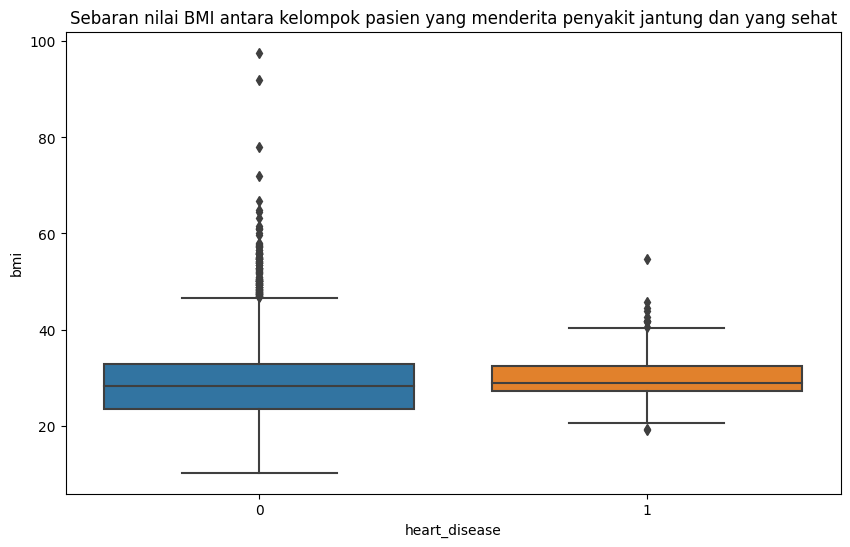

In [12]:
#2. Sebaran nilai BMI antara kelompok pasien yang menderita penyakit jantung dan yang sehat
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_stroke, y='bmi', x='heart_disease')
plt.title('Sebaran nilai BMI antara kelompok pasien yang menderita penyakit jantung dan yang sehat')
plt.show()

 0    1892
-1    1544
 1     885
 2     789
Name: smoking_status, dtype: int64


<Axes: >

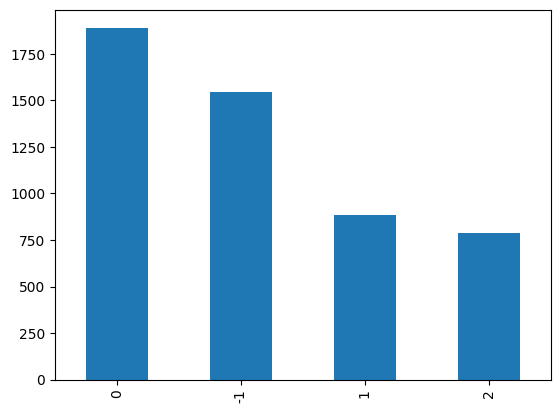

In [13]:
#3. Perbandingan jumlah pasien yang menderita stroke dengan yang sehat berdasarkan status merokok
smoking = df_stroke.smoking_status.value_counts(dropna=False)
print(smoking)
smoking.plot(kind='bar')

[Text(0.5, 1.0, 'Perbandingan jumlah pasien yang menderita stroke dengan yang sehat berdasarkan status merokok')]

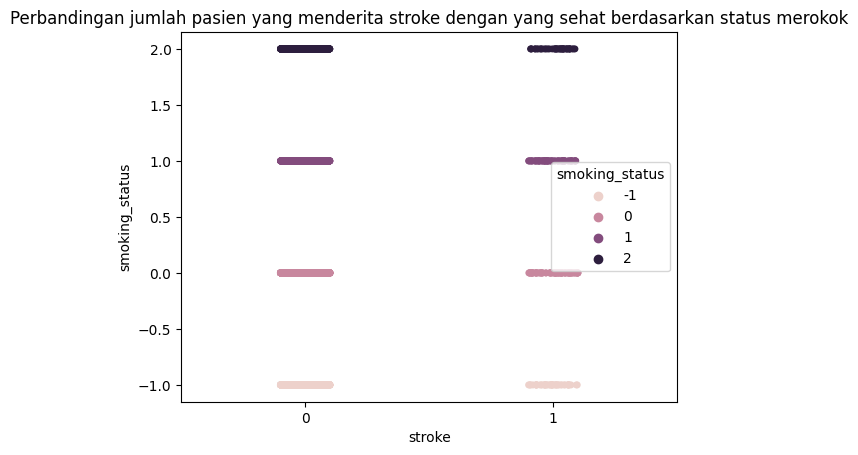

In [14]:
sns.stripplot(
    data = df_stroke, x="stroke", y="smoking_status", hue="smoking_status"
).set(title='Perbandingan jumlah pasien yang menderita stroke dengan yang sehat berdasarkan status merokok')

### Deskripsi Data Visualization
Berikan keterangan atau deskripsi singkat mengenai informasi yang diperoleh dari visualisasi data tersebut. Jawablah pertanyaan di atas pada cell markdown ini!

1. Bagaimana komposisi jumlah pasien yang tinggal di urban dan rural?

Jawab : Komposisi pasien yang tinggal di daerah urban sebanyak 2596 atau 50.8%. Sedangkan Komposisi pasien yang tinggal di daerah rural sebanyak 2514 atau 49.2%.

2. Bagaimana sebaran nilai BMI antara kelompok pasien yang menderita penyakit jantung dan yang sehat?

Jawab : Nilai BMI pada pasien yang menderita penyakit jantung rata-rata berada di angka 30-an. Sedangkan pada pasien yang tidak menderita penyakit jantung berada di angka 25 sampai 35.

3. Bagaimana perbandingan jumlah pasien yang menderita stroke dengan yang sehat berdasarkan status merokok?

Jawab : Perbandingannya cukup seimbang. Dengan perbandingan yang setara dapat dikatakan bahwa status merokok tidak menjamin seseorang terkena stroke atau tidak. 


### Data Preparation and Scaling

Lakukan train-test split dan data scaling dengan ketentuan:  

    Untuk sub A: random_state train_test_split gunakan 2 digit terakhir NPM terbesar di sub kelompok, gunakan StandardScaler  

    Untuk sub B: random_state train_test_split gunakan 2 digit terakhir NPM terkecil di sub kelompok,gunakan MinMaxScaler 

In [15]:
#train-test split dan data scaling
from sklearn.model_selection import train_test_split

X = df_stroke.drop('stroke',axis=1)
y = df_stroke['stroke']

#190710177 (Steven)
#210711407 (Alexis)
#Karena dua digit terakhir NPM terkecil adalah 07, maka akan digunakan random_state=7 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7)

print(X_train.shape)
print(X_test.shape)

(3577, 11)
(1533, 11)


In [16]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer

cat_cols = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

transformer = make_column_transformer(
    (OneHotEncoder(), cat_cols),
    remainder='passthrough'
)

X_train_enc = transformer.fit_transform(X_train)
X_test_enc = transformer.transform(X_test)

df_train_enc = pd.DataFrame(X_train_enc,columns=transformer.get_feature_names_out())
df_test_enc = pd.DataFrame(X_test_enc,columns=transformer.get_feature_names_out())

df_train_enc.head(10)
df_test_enc.head(10)

,onehotencoder__gender_-1,onehotencoder__gender_0,onehotencoder__gender_1,onehotencoder__ever_married_0,onehotencoder__ever_married_1,onehotencoder__work_type_0,onehotencoder__work_type_1,onehotencoder__work_type_2,onehotencoder__work_type_3,onehotencoder__work_type_4,...,onehotencoder__smoking_status_-1,onehotencoder__smoking_status_0,onehotencoder__smoking_status_1,onehotencoder__smoking_status_2,remainder__id,remainder__age,remainder__hypertension,remainder__heart_disease,remainder__avg_glucose_level,remainder__bmi
0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,51342.0,69.00,0.0,0.0,70.98,30.0
1,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,5875.0,37.00,0.0,0.0,103.66,36.1
2,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,7892.0,78.00,0.0,0.0,74.70,28.8
3,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,56573.0,73.00,0.0,0.0,121.83,30.3
4,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,49883.0,41.00,0.0,0.0,65.40,36.9
5,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,30285.0,72.00,0.0,1.0,74.36,27.3
6,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,12204.0,51.00,0.0,0.0,116.14,20.9
7,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,59734.0,1.72,0.0,0.0,75.79,17.6
8,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,31835.0,19.00,0.0,0.0,74.86,28.4
9,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,57109.0,12.00,0.0,0.0,81.66,23.5


In [17]:
from sklearn.preprocessing import MinMaxScaler

mm_scaler = MinMaxScaler()
mm_scaler.fit(X_train_enc)

X_train_mmscaled = mm_scaler.transform(X_train_enc)
X_test_mmscaled = mm_scaler.transform(X_test_enc)

print("X_train per-feature minimum sebelum scaling:\n {}".format(X_train_enc.min(axis=0)))
print("X_train per-feature minimum sebelum scaling:\n {}".format(X_train_enc.max(axis=0)))
print("X_train per-feature minimum sesudah scaling:\n {}".format(X_train_mmscaled.min(axis=0)))
print("X_train per-feature maximum sesudah scaling:\n {}".format(X_train_mmscaled.max(axis=0)))

X_train per-feature minimum sebelum scaling:
 [ 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
  0.    0.    0.    0.   77.    0.08  0.    0.   55.12 10.3 ]
X_train per-feature minimum sebelum scaling:
 [1.0000e+00 1.0000e+00 1.0000e+00 1.0000e+00 1.0000e+00 1.0000e+00
 1.0000e+00 1.0000e+00 1.0000e+00 1.0000e+00 1.0000e+00 1.0000e+00
 1.0000e+00 1.0000e+00 1.0000e+00 1.0000e+00 7.2940e+04 8.2000e+01
 1.0000e+00 1.0000e+00 2.7174e+02 9.7600e+01]
X_train per-feature minimum sesudah scaling:
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
X_train per-feature maximum sesudah scaling:
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


### Feature Selection

Melakukan feature selection menggunakan metode statistik univariat dan SelectFromModel untuk dibandingkan. Untuk jumlah feature, silahkan bereksperimen untuk mendapatkan jumlah performa model terbaik.

    Untuk sub A: gunakan SelectKBest dan RFE dengan ketentuan:
    jumlah feature minimal 5 dan model menggunakan RandomForestClassifier(n_estimators=100, random_state=dua digit terakhir NPM terkecil dalam sub kelompok).
    Terapkan SelectKBest dan RFE pada dataset yang belum diubah dan sudah diubah dengan StandardScaler. 

    Untuk sub B: gunakan SelectPercentile dan SelectFromModel dengan ketentuan:
    persentil minimal 30% dan model menggunakan RandomForestClassifier(n_estimators=200, random_state=dua digit terakhir NPM terbesar dalam sub kelompok).
    Terapkan SelectPercentile dan SelectFromModel pada dataset yang belum diubah dan sudah diubah dengan MinMaxScaler.

In [18]:
#lakukan rekayasa fitur sesuai yang dibutuhkan
from sklearn.feature_selection import SelectPercentile
from sklearn.preprocessing import MinMaxScaler

mm_sc = MinMaxScaler()
mm_sc.fit(X_train_enc)
X_test_sc = mm_sc.transform(X_test_enc)

SP = SelectPercentile(percentile=30)
SP.fit(X_train_mmscaled, y_train)

X_train_sp = SP.transform(X_train_mmscaled)

print("X_train: {}".format(X_train.shape))
print("X_train_sp: {}".format(X_train_sp.shape))

X_train: (3577, 11)
X_train_sp: (3577, 7)


Feature yang terpilih:  ['onehotencoder__ever_married_0' 'onehotencoder__ever_married_1'
 'onehotencoder__work_type_3' 'remainder__age' 'remainder__hypertension'
 'remainder__heart_disease' 'remainder__avg_glucose_level']


([], [])

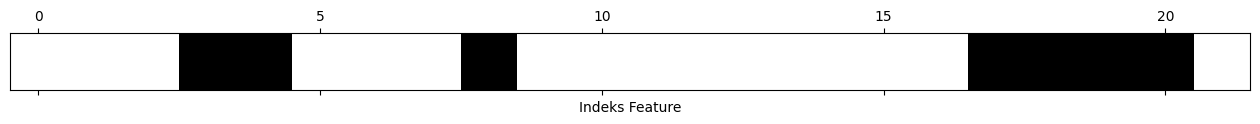

In [19]:
mask = SP.get_support()
print("Feature yang terpilih: ",df_train_enc.columns[mask].values)

plt.matshow(mask.reshape(1, -1), cmap = 'gray_r')
plt.xlabel("Indeks Feature")
plt.yticks(())

In [20]:
from sklearn.linear_model import LogisticRegression

X_test_sp = SP.transform(X_test_sc)

LogReg = LogisticRegression(max_iter=10000)
LogReg.fit(X_train_enc, y_train)
print("Akurasi Logistic Regression menggunakan semua feature: {:.2f}".format(LogReg.score(X_test_enc, y_test)))
LogReg.fit(X_train_sp, y_train)
print("Akurasi Logistic Regression menggunakan feature terplih SelectPercentile: {:.2f}".format(
    LogReg.score(X_test_sp, y_test)))

Akurasi Logistic Regression menggunakan semua feature: 0.95
Akurasi Logistic Regression menggunakan feature terplih SelectPercentile: 0.95


In [21]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

#190710177 (Steven)
#210711407 (Alexis)
#Karena dua digit terakhir NPM terbesar adalah 77, maka akan digunakan random_state=77

selectM = SelectFromModel(
    RandomForestClassifier(n_estimators=200, random_state=77),
    threshold="median")

selectM.fit(X_train_enc, y_train)
X_train_smodel = selectM.transform(X_train_enc)
print("X_train: {}".format(X_train_enc.shape))
print("X_train_smodel: {}".format(X_train_smodel.shape))

X_train: (3577, 22)
X_train_smodel: (3577, 11)


Feature yang terpilih:  ['onehotencoder__gender_1' 'onehotencoder__work_type_0'
 'onehotencoder__work_type_1' 'onehotencoder__Residence_type_1'
 'onehotencoder__smoking_status_0' 'remainder__id' 'remainder__age'
 'remainder__hypertension' 'remainder__heart_disease'
 'remainder__avg_glucose_level' 'remainder__bmi']


([], [])

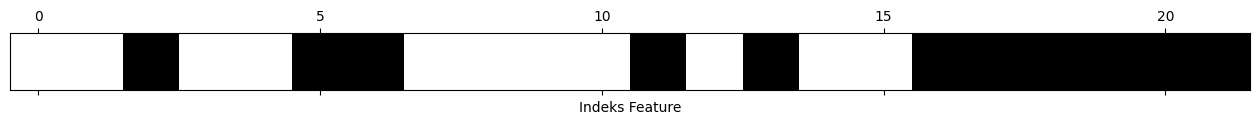

In [22]:
mask = selectM.get_support()
print("Feature yang terpilih: ",df_train_enc.columns[mask].values)

plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel("Indeks Feature")
plt.yticks(())

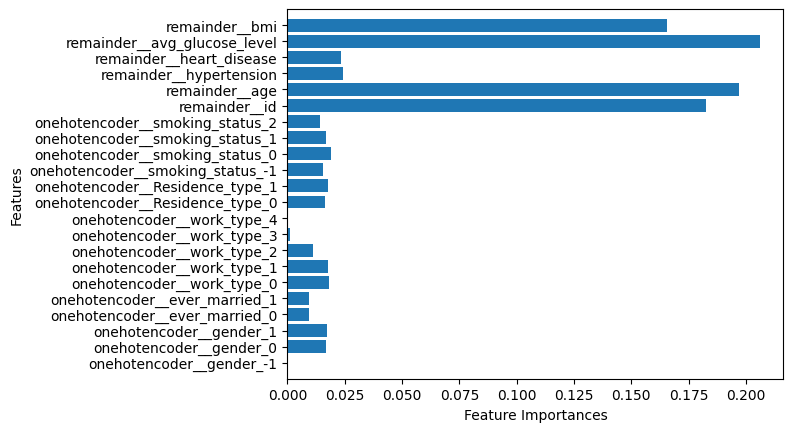

In [39]:
def plot_feature_importances(classifier, dataset, feat_names):
  n_feat=dataset.shape[1]
  plt.barh(range(n_feat),classifier.feature_importances_,align='center')
  plt.yticks(np.arange(n_feat),feat_names)
  plt.xlabel('Feature Importances')
  plt.ylabel('Features')
  plt.ylim(-1,n_feat)
  plt.show()

plot_feature_importances(selectM.estimator_,df_train_enc,df_train_enc.columns)

In [40]:
X_test_select = selectM.transform(X_test_enc)
score = LogisticRegression(max_iter=10000).fit(X_train_smodel, y_train) \
                                .score(X_test_select, y_test)
print("Test score before feature selection: {:.3f}".format(LogisticRegression(max_iter=10000) \
                                                           .fit(X_train_enc, y_train).score(X_test_enc, y_test)))
print("Test score after feature selection: {:.3f}".format(score))

Test score before feature selection: 0.947
Test score after feature selection: 0.947


### Modelling

Menggunakan 2 algoritme pembelajaran mesin untuk klasifikasi. Eksplorasi pengaturan parameter yang ada pada algoritme yang akan Anda gunakan, tidak terbatas pada 1-2 parameter saja supaya optimal (selain random_state). Silahkan bereksperimen untuk parameter seperti n_estimators, max_depth, dll. agar mendapat akurasi terbaik.

Ketentuan:

    Sub A:
    1. DecisionTreeClassifier(random_state= dua digit terakhir NPM terbesar dalam sub kelompok, max_depth=bebas,criterion='entropy')
    2. LogisticRegression(C=bebas, max_iter=10000, class_weight='balanced')`

    Sub B:
    1. K-Nearest Neighbors(n_neighbors=bebas, weights='distance')
    2. LinearSVC(C=bebas, class_weight='balanced')

Total ada 6 model yang harus diuji dengan rincian:

<table>
<thead>
  <tr>
    <th>Sub kelompok</th>
    <th>Scaler</th>
    <th>Feature Selection</th>
    <th>Model</th>
    <th>Kombinasi Pengujian Training Set dan Test Set</th>
  </tr>
</thead>
<tbody>
  <tr>
    <td>A</td>
    <td>StandardScaler</td>
    <td>SelectKBest</td>
    <td>Decision Tree</td>
    <td>StandardScaler+DecisionTree | StandardScaler+SelectKBest+DecisionTree</td>
  </tr>
  <tr>
    <td>A</td>
    <td>StandardScaler</td>
    <td>SelectKBest</td>
    <td>LogisticRegression</td>
    <td>StandardScaler+LogisticRegression | StandardScaler+SelectKBest+LogisticRegression</td>
  </tr>
  <tr>
    <td>A</td>
    <td>StandardScaler</td>
    <td>RFE</td>
    <td>Decision Tree</td>
    <td>StandardScaler+RFE+DecisionTree</td>
  </tr>
  <tr>
    <td>A</td>
    <td>StandardScaler</td>
    <td>RFE</td>
    <td>LogisticRegression</td>
    <td>StandardScaler+RFE+LogisticRegression</td>
  </tr>
  <tr>
    <td>B</td>
    <td>MinMaxScaler</td>
    <td>SelectPercentile</td>
    <td>KNN</td>
    <td>MinMaxScaler+KNN | MinMaxScaler+SelectPercentile+KNN</td>
  </tr>
  <tr>
    <td>B</td>
    <td>MinMaxScaler</td>
    <td>SelectPercentile</td>
    <td>LinearSVC</td>
    <td>MinMaxScaler+LinearSVC | MinMaxScaler+SelectPercentile+LinearSVC</td>
  </tr>
  <tr>
    <td>B</td>
    <td>MinMaxScaler</td>
    <td>SelectFromModel</td>
    <td>KNN</td>
    <td>MinMaxScaler+SelectPercentile+KNN</td>
  </tr>
  <tr>
    <td>B</td>
    <td>MinMaxScaler</td>
    <td>SelectFromModel</td>
    <td>LinearSVC</td>
    <td>MinMaxScaler+SelectFromModel+LinearSVC</td>
  </tr>
</tbody>
</table>

In [41]:
#cell code ini untuk proses pembuatan model
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors=5,p=2)
KNN.fit(X_train,y_train)

KNeighborsClassifier()

In [42]:
from sklearn.metrics import classification_report

y_pred = KNN.predict(X)
y_prob = KNN.predict_proba(X)[:, 1]
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.98      4861
           1       0.83      0.02      0.04       249

    accuracy                           0.95      5110
   macro avg       0.89      0.51      0.51      5110
weighted avg       0.95      0.95      0.93      5110



In [43]:
from sklearn.model_selection import cross_validate
cv_results = cross_validate(KNN, X, y, cv=5, scoring=["accuracy", "f1"])
print("test_accuracy: ", cv_results['test_accuracy'].mean())
print("test_f1: ", cv_results['test_f1'].mean())

test_accuracy:  0.9512720156555773
test_f1:  0.01584313725490196


In [44]:
#lakukan proses evaluasi model algoritme pembelajaran mesin
KNN_params = {"n_neighbors": range(2, 50)}
print("test_accuracy: ", cv_results['test_accuracy'].mean())
print("test_f1: ", cv_results['test_f1'].mean())

test_accuracy:  0.9512720156555773
test_f1:  0.01584313725490196


In [45]:
KNN.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

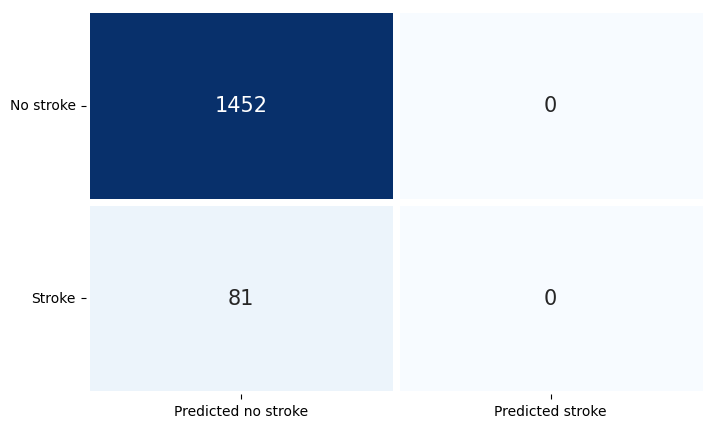

In [46]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

svc = SVC(random_state=0,probability=True)
svc.fit(X_train_enc, y_train)
y_pred = svc.predict(X_test_enc)
y_prob = svc.predict_proba(X_test_enc)[:,1]
svc_cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize = (8, 5))
sns.heatmap(svc_cm, cmap = 'Blues', annot = True, fmt = 'd', linewidths = 5, cbar = False, annot_kws = {'fontsize': 15}, 
            yticklabels = ['No stroke', 'Stroke'], xticklabels = ['Predicted no stroke', 'Predicted stroke'])
plt.yticks(rotation = 0)
plt.show()

In [47]:
#MinMaxScaler+KNN
KNN_mmscaled = KNeighborsClassifier(n_neighbors=10, weights='distance')
KNN_mmscaled.fit(X_train_mmscaled,y_train)

KNeighborsClassifier(n_neighbors=10, weights='distance')

In [48]:
#MinMaxScaler+SelectPercentile+KNN
KNN_sp = KNeighborsClassifier(n_neighbors=15, weights = 'distance')
KNN_sp.fit(X_train_sp,y_train)

KNeighborsClassifier(n_neighbors=15, weights='distance')

In [49]:
#MinMaxScaler+LinearSVC
SVC_model_mmscaled = SVC(C=100, class_weight='balanced')
SVC_model_mmscaled.fit(X_train_mmscaled,y_train)

SVC(C=100, class_weight='balanced')

In [50]:
#MinMaxScaler+SelectPercentile+LinearSVC
SVC_model_sp = SVC(C=200, class_weight='balanced')
SVC_model_sp.fit(X_train_sp,y_train)

SVC(C=200, class_weight='balanced')

In [51]:
#MinMaxScaler+SelectPercentile+KNN
KNN_SFM = KNeighborsClassifier(n_neighbors=15, weights='distance')
KNN_SFM.fit(X_train_smodel,y_train)

KNeighborsClassifier(n_neighbors=15, weights='distance')

In [52]:
#MinMaxScaler+SelectFromModel+LinearSVC
SVC_model_SFM = SVC(C=300, class_weight='balanced')
SVC_model_SFM.fit(X_train_smodel,y_train)

SVC(C=300, class_weight='balanced')

### Evaluasi Model

Bagian berikut berisi evaluasi model secara sederhana menggunakan metrik akurasi (fungsi score). Uji akurasi hasil pembelajaran pada train set dan test set.

In [53]:
#lakukan proses evaluasi model algoritme pembelajaran mesin
print("Akurasi KNN pada train set:",KNN.score(X_train,y_train))
print("Akurasi KNN test set:",KNN.score(X_test,y_test))

Akurasi KNN pada train set: 0.9544310875034946
Akurasi KNN test set: 0.9465101108936725


## Kesimpulan

Silahkan jawab pertanyaan berikut:

1. Apakah ada pengaruh penskalaan data pada dataset terhadap performa model-model machine learning? 

2. Apa saja feature-feature yang penting untuk membedakan antara pasien yang rawan terkena stroke dengan yang sehat? 

3. Model apakah yang memiliki performa paling baik terhadap dataset? Apakah parameter setting yang paling optimal dari model tersebut?

*tulis jawaban Anda di cell ini*

1. Jarak antara nilai variabel menjadi standarized dan mempengaruhi performa model. Pada data feature yang memiliki nilai berbeda akan mempersulit performa model. Dengan penskalaan data, dapat meningkatkan performa dan stabilitas model.

2. work_type, age, hypertension, heart_disease, avg_glucose_level, dan bmi.

3. Model MinMaxScaler+SelectPercentile+LinearSVC dengan parameter C=200, class_weight='balanced'.